In [1]:
#Importing the necessary libraries needed for my analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
#Importing dataset neeeded for analysis
data=pd.read_csv("C:\\Users\\user\\Downloads\\Market Basket Analysis - Groceries_dataset.csv")

In [3]:
#Exploration
print(data.head())
print(data.info())
item_counts = data['itemDescription'].value_counts()
print(item_counts)

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None
itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation

In [5]:
#Cleaning
data['Member_number'] = data['Member_number'].astype(str)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

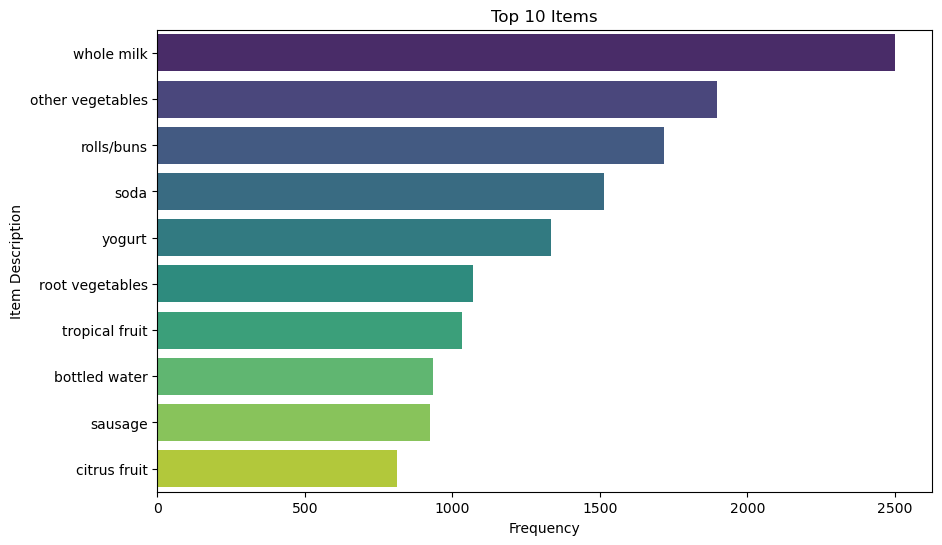

In [6]:
#Visualising the top 10 items
top_items = item_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Items')
plt.xlabel('Frequency')
plt.ylabel('Item Description')
plt.show()

In [7]:
#Processing data for Market basket analysis by grouping them into baskets
basket = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')
print(basket.head())

  Member_number       Date                                              items
0          1000 2014-06-24                  [whole milk, pastry, salty snack]
1          1000 2015-03-15  [sausage, whole milk, semi-finished bread, yog...
2          1000 2015-05-27                         [soda, pickled vegetables]
3          1000 2015-07-24                     [canned beer, misc. beverages]
4          1000 2015-11-25                        [sausage, hygiene articles]


In [8]:
#Converting my list of items into a transaction matrix
te = TransactionEncoder()
basket_encoded = te.fit(basket['items']).transform(basket['items'])
data_basket = pd.DataFrame(basket_encoded, columns=te.columns_)

In [20]:
#Finding frequent items using the apriori algorithm
frequent_itemsets = apriori(data_basket, min_support=0.001, use_colnames=True)

In [21]:
#Generating association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.head())

        antecedents       consequents  antecedent support  consequent support  \
0  (tropical fruit)        (UHT-milk)            0.067767            0.021386   
1        (UHT-milk)  (tropical fruit)            0.021386            0.067767   
2     (brown bread)            (beef)            0.037626            0.033950   
3            (beef)     (brown bread)            0.033950            0.037626   
4    (citrus fruit)            (beef)            0.053131            0.033950   

    support  confidence      lift      leverage  conviction  zhangs_metric  
0  0.001537    0.022682  1.060617  8.785064e-05    1.001326       0.061307  
1  0.001537    0.071875  1.060617  8.785064e-05    1.004426       0.058402  
2  0.001537    0.040853  1.203301  2.597018e-04    1.007196       0.175559  
3  0.001537    0.045276  1.203301  2.597018e-04    1.008012       0.174891  
4  0.001804    0.033962  1.000349  6.297697e-07    1.000012       0.000369  


In [22]:
#Generating association rules sorting by zhangs metric
rules = association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules.sort_values('zhangs_metric', ascending = False, inplace = True)
print(rules)

                 antecedents              consequents  antecedent support  \
238                (sausage)     (whole milk, yogurt)            0.060349   
235     (whole milk, yogurt)                (sausage)            0.011161   
239                 (yogurt)    (whole milk, sausage)            0.085879   
234    (whole milk, sausage)                 (yogurt)            0.008955   
237             (whole milk)        (sausage, yogurt)            0.157923   
..                       ...                      ...                 ...   
145                 (grapes)                   (soda)            0.014436   
4             (citrus fruit)                   (beef)            0.053131   
5                     (beef)           (citrus fruit)            0.033950   
138             (rolls/buns)  (fruit/vegetable juice)            0.110005   
139  (fruit/vegetable juice)             (rolls/buns)            0.034017   

     consequent support   support  confidence      lift      leverage  \
23

In [23]:
#Selecting top rules for visualisation
top_rules = rules.head(10)

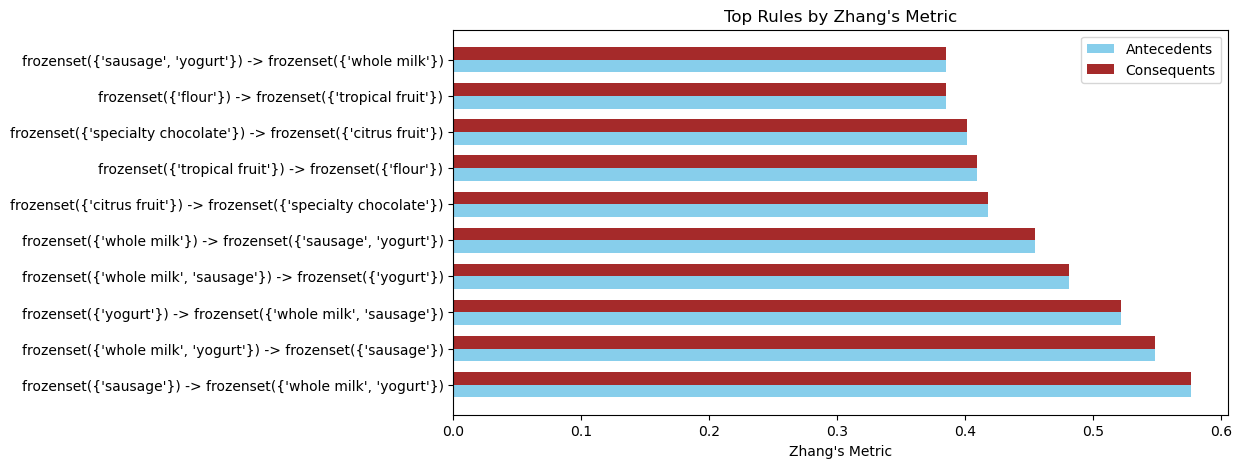

In [30]:
#Creating a bar chart with grouped bars for antecedents and consequents
import numpy as np
bar_width = 0.35
index = np.arange(len(top_rules))

#Plotting a barchat for top 10 rules by zhangs metric
plt.figure(figsize=(10, 5))

plt.barh(index, top_rules['zhangs_metric'], bar_width, label='Antecedents', color='skyblue')
plt.barh(index + bar_width, top_rules['zhangs_metric'], bar_width, label='Consequents', color='brown')

plt.xlabel('Zhang\'s Metric')
plt.title('Top Rules by Zhang\'s Metric')
plt.yticks(index + bar_width / 2, top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str))
plt.legend()

plt.show()

In [ ]:
#Insights and Recommendation
#Items like sausage, whole milk, yogurt, and soda are frequently purchased, forming the basis for many association rules.
#Cross-category associations, such as between dairy products (whole milk, yogurt) and meat products (sausage), suggest opportunities for cross-marketing or bundling.
#Confidence levels vary, indicating different strengths of association between antecedents and consequents. Some rules have higher confidence, suggesting more reliable associations.
#Rules with high lift values suggest that certain combinations of items are purchased together more often than expected, indicating potential synergies in marketing or shelf placement.
#Recommendations include promotional bundling, cross-marketing, and customer segmentation strategies based on specific rule characteristics and business objectives.